<a href="https://colab.research.google.com/github/smaswin21/fundamental-of-data-analytics/blob/main/FDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [4]:
# Importing Libraries

import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

plt.style.use('seaborn-whitegrid')

from IPython.display import HTML
from IPython.display import display, Image



import statsmodels.stats.weightstats as smw
import statsmodels.stats.proportion as smp
# Using the CLT Theorem

from scipy.stats import norm
import pandas as pd
import statsmodels.api as sm


<ipython-input-4-c67058516994>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Importing Google Colabs

In [5]:
# Step 1 - import the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Independent Variables : Income_Tax, Unemployment.  

Dependent Variables : GDP_capita

Independent Variables : Income_Tax, Unemployment.  

Dependent Variables : GDP_Growth

1. Introduction of dataset

2. Looking into the data

3. Univariate analysis

- Probability Density Function
- Cumulative Density Function
- Box plot
- Violin plot

4. Bivariate analysis

- Scatter plot
- Pair plot

5. Multivariate analysis

- Contour plot

In [6]:
import pandas as pd
path="/content/drive/MyDrive/FDA - Project /Datasets/fda_final.xlsx"
data = pd.read_excel(path)


Basics

In [7]:
data.shape # This dataset has 27 data points and 4 features

(27, 5)

In [8]:
print(data.head()) #

   Country   GDP_growth  Income_Tax  GDP_capita  Unemployment 
0   Austria         4.6        22.4       68775      31.523942
1   Belgium         6.1        26.7       65818      42.296179
2  Bulgaria         7.6        10.3       32233      28.248467
3   Croatia        13.1        20.1       40214      20.285690
4    Cyprus         6.6        19.7       43318      24.156616


In [9]:
data['Serial_no'] = range(1, 28)
data.head()

,Country,GDP_growth,Income_Tax,GDP_capita,Unemployment,Serial_no
0,Austria,4.6,22.4,68775,31.523942,1
1,Belgium,6.1,26.7,65818,42.296179,2
2,Bulgaria,7.6,10.3,32233,28.248467,3
3,Croatia,13.1,20.1,40214,20.285690,4
4,Cyprus,6.6,19.7,43318,24.156616,5


In [10]:
print(data.columns)


Index(['Country ', 'GDP_growth', 'Income_Tax', 'GDP_capita', 'Unemployment ',
       'Serial_no'],
      dtype='object')


OUTLIERS


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import scipy.stats as ss

import matplotlib.gridspec as gridspec

#!pip install statsmodels==0.10.0rc2 --pre
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import MultiComparison

<ipython-input-12-a157f7937225>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [16]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming 'df' is your dataset stored in a pandas DataFrame
# Assuming 'variable_names' is a list of the variable names you want to compute z-scores for

# Select the columns for the specified variable names
data_selected = data[["GDP_growth", "Income_Tax", "GDP_capita", "Unemployment "]]

# Compute z-scores for the selected columns
data_z = np.abs(stats.zscore(data_selected))

# You can convert the resulting array back to a DataFrame if needed
data_z = pd.DataFrame(data_z, columns=["GDP_growth", "Income_Tax", "GDP_capita", "Unemployment"])

# Print the DataFrame with z-scores
print(data_z)


    GDP_growth  Income_Tax  GDP_capita  Unemployment
0     0.641802    0.055902    0.464464           NaN
1     0.051052    0.555153    0.345955           NaN
2     0.539697    1.348965    1.000047           NaN
3     2.705778    0.211139    0.680189           NaN
4     0.145864    0.257581    0.555788           NaN
5     1.075018    1.488291    0.289714           NaN
6     0.523652    3.515824    0.712423           NaN
7     0.697230    0.176307    0.379327           NaN
8     1.271935    0.926688    0.105089           NaN
9     0.224631    0.106644    0.059629           NaN
10    1.429468    0.543542    0.277142           NaN
11    0.854763    1.499901    0.800501           NaN
12    0.342781    0.756831    0.581959           NaN
13    2.902695    1.263392    2.851797           NaN
14    0.185247    0.462269    0.189360           NaN
15    0.838718    0.269191    0.661312           NaN
16    0.090436    0.172007    0.317448           NaN
17    0.444885    0.497100    3.455123        

# Central Measure Tendency

In [17]:
import pandas as pd

# get a summary of the dataset
print(data.describe())

# get the correlation matrix of the dataset
print(data.corr())

       GDP_growth  Income_Tax     GDP_capita  Unemployment   Serial_no
count   27.000000   27.000000      27.000000      27.000000  27.000000
mean     6.229630   21.918519   57185.851852      35.188985  14.000000
std      2.587517    8.776982   25426.999171      11.397225   7.937254
min      2.600000    9.000000   32233.000000      19.314583   1.000000
25%      4.900000   17.500000   42518.500000      27.664151   7.500000
50%      6.000000   21.700000   49265.000000      32.567796  14.000000
75%      6.950000   26.050000   64655.000000      41.392696  20.500000
max     13.600000   52.200000  143397.000000      62.914613  27.000000
               GDP_growth  Income_Tax  GDP_capita  Unemployment   Serial_no
GDP_growth       1.000000   -0.041737    0.133081      -0.307790  -0.162927
Income_Tax      -0.041737    1.000000    0.519125       0.101849  -0.071827
GDP_capita       0.133081    0.519125    1.000000      -0.211271   0.002123
Unemployment    -0.307790    0.101849   -0.211271       1

<ipython-input-17-654b7aa23f65>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


1. GDP_growth

In [18]:
# get the mean and standard deviation of the GDP growth column
mean = data['GDP_growth'].mean()
std = data['GDP_growth'].std()
mode = data["GDP_growth"].mode()
median = data["GDP_growth"].median()

print('Mean GDP growth:', mean)
print('Standard deviation of GDP growth:', std)
print('Mode of GDP growth:', mode)
print('Median of GDP growth:', mode)

Mean GDP growth: 6.229629629629629
Standard deviation of GDP growth: 2.5875166019259015
Mode of GDP growth: 0    5.1
Name: GDP_growth, dtype: float64
Median of GDP growth: 0    5.1
Name: GDP_growth, dtype: float64


2. Income_Tax

In [19]:
mean = data['Income_Tax'].mean()
std = data['Income_Tax'].std()
mode = data["Income_Tax"].mode()
median = data["Income_Tax"].median()

print('Mean :', mean)
print('Standard deviation :', std)
print('Mode :', mode)
print('Median :', median)

Mean : 21.918518518518518
Standard deviation : 8.776982004391549
Mode : 0    19.6
Name: Income_Tax, dtype: float64
Median : 21.7


3. Unemployment

In [20]:
mean = data['Unemployment '].mean()
std = data['Unemployment '].std()
mode = data['Unemployment '].mode()
median = data['Unemployment '].median()

print('Mean :', mean)
print('Standard deviation :', std)

print('Median :', median)

Mean : 35.1889849782751
Standard deviation : 11.39722545357657
Median : 32.5677960475731


4. GDP_capita

In [21]:
mean = data['GDP_capita'].mean()
std = data['GDP_capita'].std()
mode = data['GDP_capita'].mode()
median = data['GDP_capita'].median()

print('Mean :', mean)
print('Standard deviation :', std)

print('Median :', median)

Mean : 57185.851851851854
Standard deviation : 25426.999170632815
Median : 49265.0


Boxplots

1. GDP Growth
2. Income_Tax
3. GDP_capita
4. Unemployment

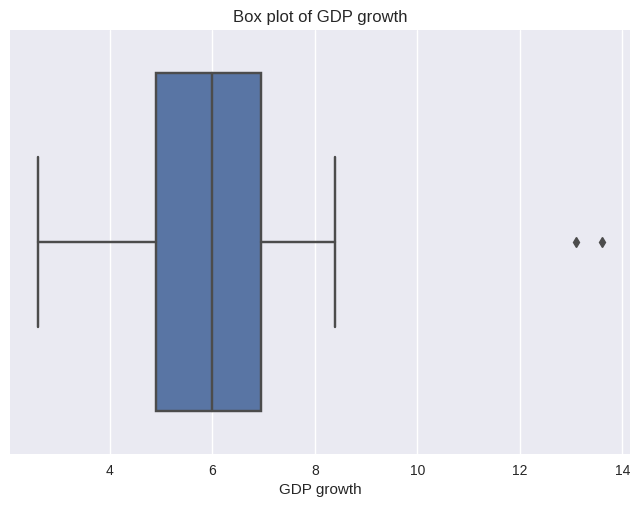

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['GDP_growth'])

# set the plot title and axis labels
plt.title('Box plot of GDP growth')
plt.xlabel('GDP growth')

# show the plot
plt.show()

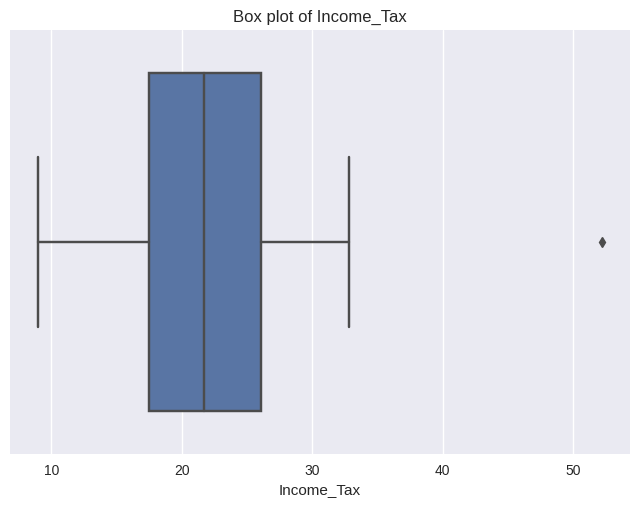

In [23]:
sns.boxplot(x=data['Income_Tax'])

# set the plot title and axis labels
plt.title('Box plot of Income_Tax')
plt.xlabel('Income_Tax')

# show the plot
plt.show()

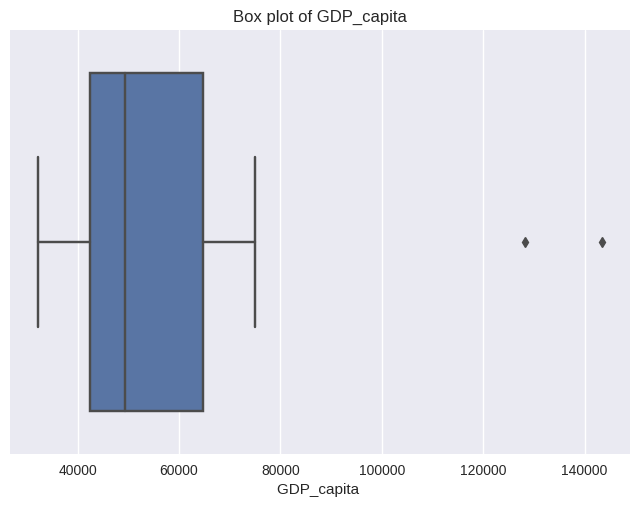

In [24]:
sns.boxplot(x=data['GDP_capita'])

# set the plot title and axis labels
plt.title('Box plot of GDP_capita')
plt.xlabel('GDP_capita ')

# show the plot
plt.show()

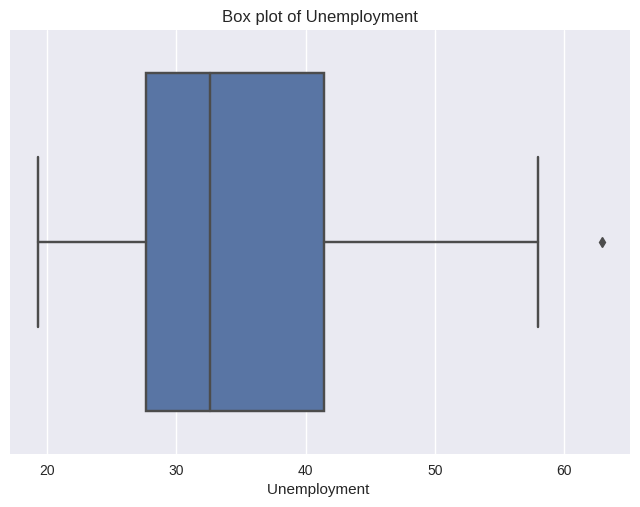

In [25]:
sns.boxplot(x=data['Unemployment '])

# set the plot title and axis labels
plt.title('Box plot of Unemployment')
plt.xlabel('Unemployment ')

# show the plot
plt.show()

Skew

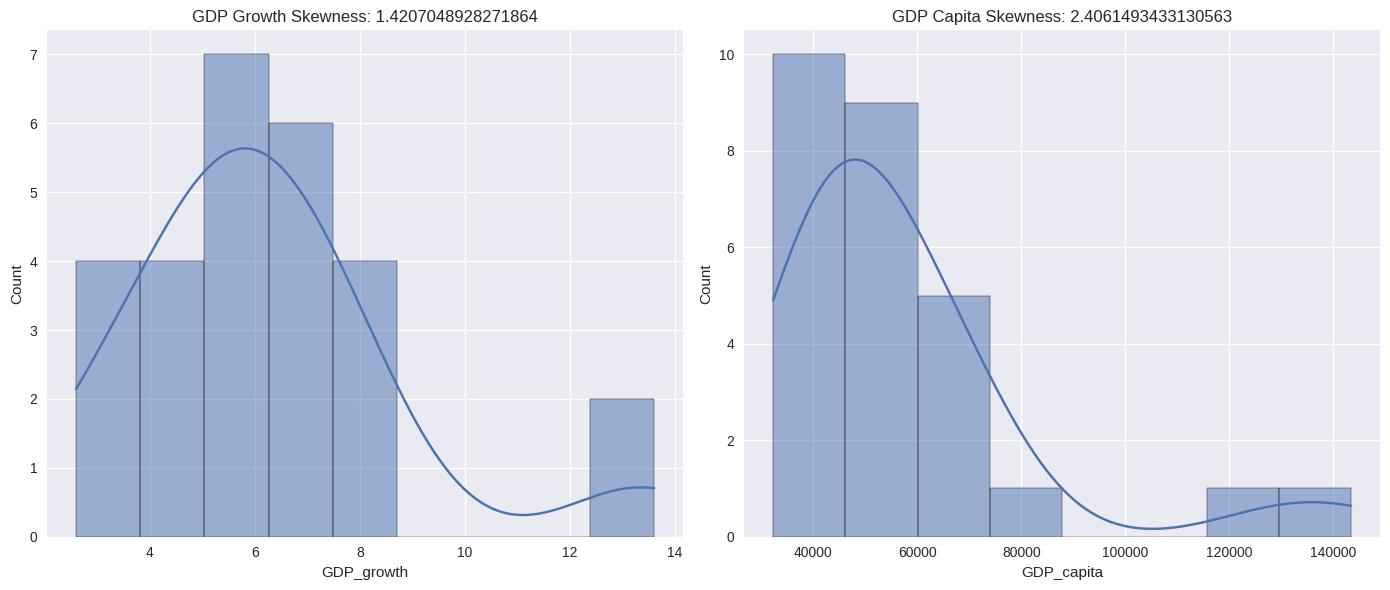

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# plot the histogram for 'Serial No'
sns.histplot(data=data, x='GDP_growth', kde=True, ax=ax[0])
ax[0].set_title('GDP Growth Skewness: {}'.format(data['GDP_growth'].skew()))

# plot the histogram for 'GDP'
sns.histplot(data=data, x='GDP_capita', kde=True, ax=ax[1])
ax[1].set_title('GDP Capita Skewness: {}'.format(data['GDP_capita'].skew()))

plt.tight_layout()
plt.show()


Bi-Variate Analysis

1. Scatterplot

a. GDP_capita

b. GDP_growth



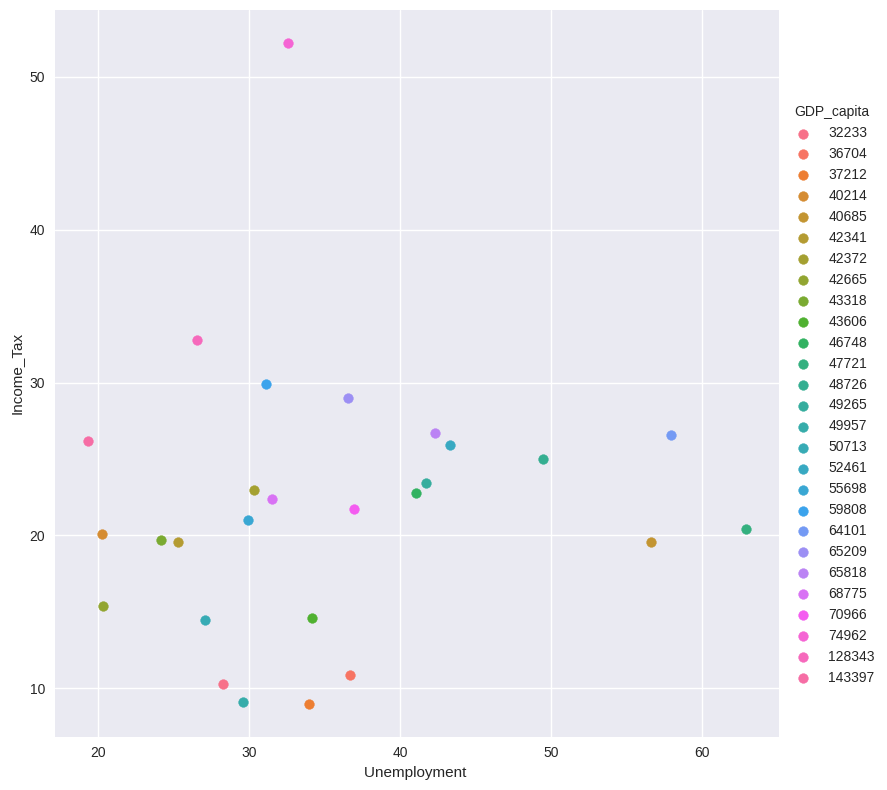

In [27]:
# a
sns.FacetGrid(data, hue="GDP_capita", height=8) \
   .map(plt.scatter, "Unemployment ", "Income_Tax") \
   .add_legend();

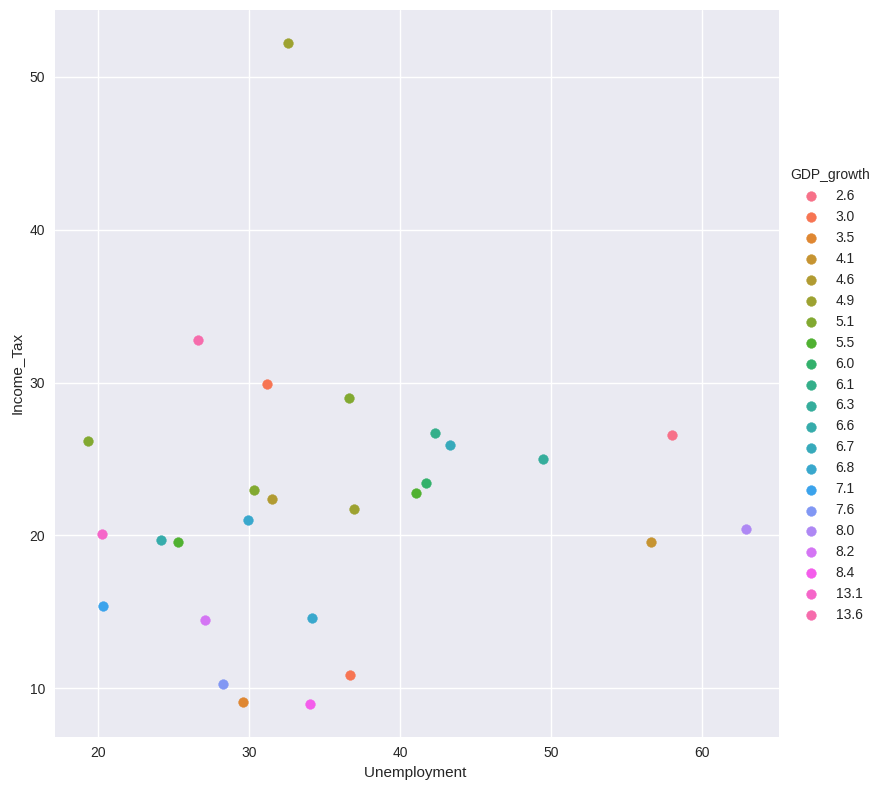

In [28]:
# b
sns.FacetGrid(data, hue="GDP_growth", height=8) \
   .map(plt.scatter, "Unemployment ", "Income_Tax") \
   .add_legend();

ANOVA


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import scipy.stats as ss

import matplotlib.gridspec as gridspec

#!pip install statsmodels==0.10.0rc2 --pre
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import MultiComparison


<ipython-input-30-a157f7937225>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [31]:
mt=data['Income_Tax'].describe()
mt

count    27.000000
mean     21.918519
std       8.776982
min       9.000000
25%      17.500000
50%      21.700000
75%      26.050000
max      52.200000
Name: Income_Tax, dtype: float64

In [32]:
mt=data['GDP_capita'].describe()
mt

count        27.000000
mean      57185.851852
std       25426.999171
min       32233.000000
25%       42518.500000
50%       49265.000000
75%       64655.000000
max      143397.000000
Name: GDP_capita, dtype: float64

In [33]:
mt=data['GDP_growth'].describe()
mt

count    27.000000
mean      6.229630
std       2.587517
min       2.600000
25%       4.900000
50%       6.000000
75%       6.950000
max      13.600000
Name: GDP_growth, dtype: float64

In [34]:
mt=data['Unemployment '].describe()
mt

count    27.000000
mean     35.188985
std      11.397225
min      19.314583
25%      27.664151
50%      32.567796
75%      41.392696
max      62.914613
Name: Unemployment , dtype: float64

In [35]:
data['Tax_Group_3levels'] = np.where(data['Income_Tax'] < 17.5, 'L',
                                      np.where(data['Income_Tax'] < 26.05, 'M', 'H'))

In [36]:
mu=data['Unemployment '].mean()

In [37]:
data['Unemployment_Group']=np.where(data['Unemployment ']<mu,'L','H')

In [38]:
mg=data['GDP_capita'].mean()

In [39]:
data['GDP_Group']=np.where(data['GDP_capita']<mg,'L','H')

In [40]:
model = ols('GDP_growth~C(Tax_Group_3levels)*C(Unemployment_Group)', data=data).fit()
table = sm.stats.anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(Tax_Group_3levels),2.0,1.987725,0.993862,0.140781,0.869493
C(Unemployment_Group),1.0,17.880944,17.880944,2.532838,0.126442
C(Tax_Group_3levels):C(Unemployment_Group),2.0,5.955008,2.977504,0.421764,0.661323
Residual,21.0,148.252619,7.059649,NaN,NaN


In [41]:
model = ols('GDP_capita~C(Tax_Group_3levels)*C(Unemployment_Group)', data=data).fit()
table = sm.stats.anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(Tax_Group_3levels),2.0,8.114487e+09,4.057244e+09,13.407602,0.000177
C(Unemployment_Group),1.0,6.398072e+08,6.398072e+08,2.114312,0.160711
C(Tax_Group_3levels):C(Unemployment_Group),2.0,1.700783e+09,8.503917e+08,2.810212,0.082898
Residual,21.0,6.354762e+09,3.026077e+08,NaN,NaN
